In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams["figure.figsize"] = (10,10)

df = pd.read_excel('data/Exercice_SalesData.xlsx')

In [2]:
df.columns.values.tolist()

[u'SalesOrderNumber',
 u'OrderDate',
 u'DueDate',
 u'ShipDate',
 u'Sales_Person',
 u'Sales_Region',
 u'Sales_Province',
 u'Sales_City',
 u'Sales_Postal_Code',
 u'Customer_Code',
 u'Customer_Name',
 u'Customer_Region',
 u'Customer_Province',
 u'Customer_City',
 u'Customer_Postal_Code',
 u'LineItem_Id',
 u'Product_Category',
 u'Product_Sub_Category',
 u'Product_Name',
 u'Product_Code',
 u'Unit_Cost',
 u'UnitPrice',
 u'UnitPriceDiscount',
 u'OrderQty',
 u'Unit_Freight_Cost']

### metrics
interestinng metrics could be the "order turn over" and the "order profit".
turn over is the unit price times the order quantity.
order profit is the order turn over minus the order costs.

In [3]:
df['OrderTurnOver'] = df['UnitPrice'] * df['OrderQty']
df['OrderProfit'] = df['OrderTurnOver'] - (df['Unit_Cost'] * df['OrderQty'])

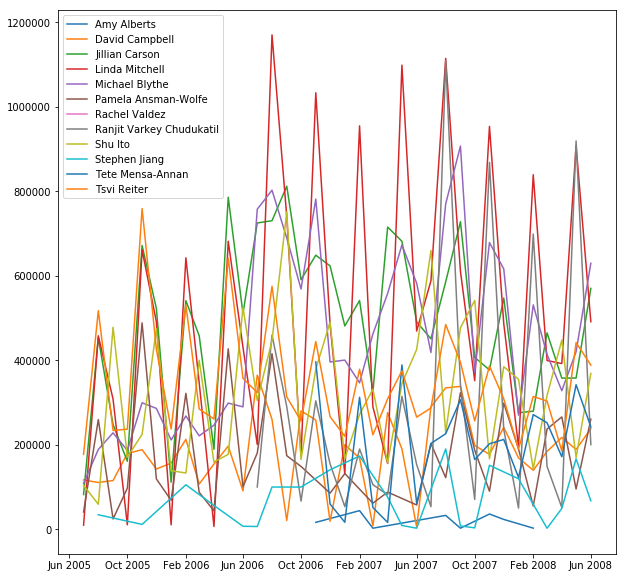

In [4]:
legend = []
for title, group in df.groupby('Sales_Person'):
    legend.append(title)
    plot_values = defaultdict(list)
    for date, subgroup in group.groupby('OrderDate'):
        plot_values['OrderTurnOver'].append(subgroup['OrderTurnOver'].sum())
        plot_values['OrderDate'].append(date)
        plot_values['Sales_Person'].append(title)
    df_plot = pd.DataFrame(plot_values)
    plt.plot(df_plot['OrderDate'],df_plot['OrderTurnOver'])
    
plt.legend(legend, loc='upper left', prop={'size': 10})
plt.show()



### description

we list the total turnover per sales person. we see that since the beginning of our data Linda Mitchell (17,5 million $), Jillian Carson (+- 17,5 million $) and Michial Blyte (+- 16,5 million $) have the highest turn over so far.

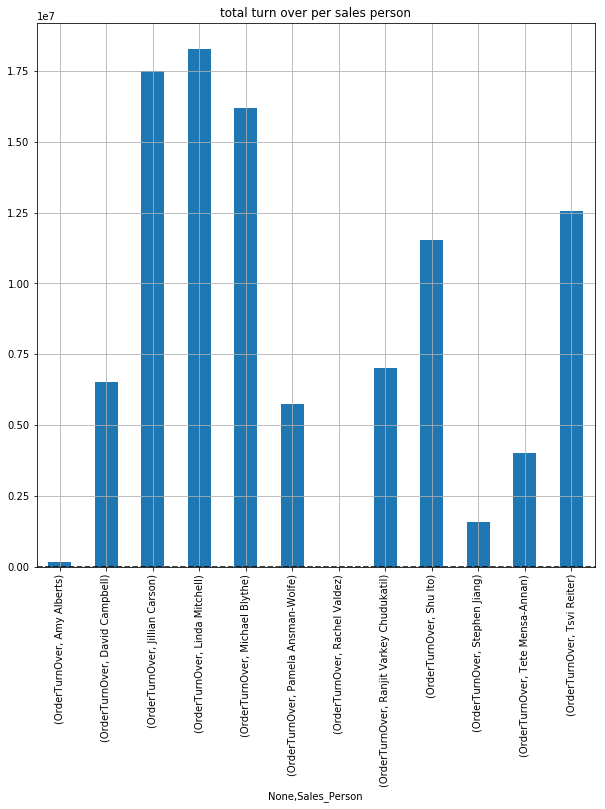

               Sales_Person            
OrderTurnOver  Amy Alberts                   159711.480000
               David Campbell               6534883.135000
               Jillian Carson              17495799.530001
               Linda Mitchell              18281932.770000
               Michael Blythe              16200444.040001
               Pamela Ansman-Wolfe          5746924.910000
               Rachel Valdez                    337.220000
               Ranjit Varkey Chudukatil     7019306.520000
               Shu Ito                     11535000.040000
               Stephen Jiang                1578761.195000
               Tete Mensa-Annan             4018544.520000
               Tsvi Reiter                 12550459.825001
dtype: float64


In [136]:
df_plot_to = df[['OrderTurnOver', 'Sales_Person']]
df_plot_to = df_plot_to.groupby('Sales_Person').sum().unstack()
df_plot_to.plot(kind='bar', title='total turn over per sales person')
plt.show()


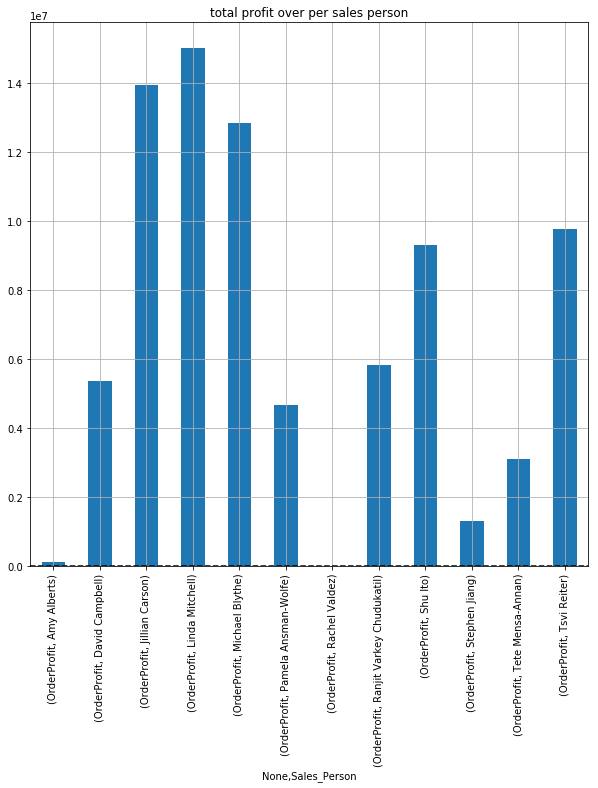

In [137]:
df_plot_profit = df[['OrderProfit', 'Sales_Person']]
df_plot_profit = df_plot_profit.groupby('Sales_Person').sum().unstack()
df_plot_profit.plot(kind='bar', title='total profit over per sales person')
plt.show()

In [7]:
df_plot_per_date = df[['OrderTurnOver', 'Sales_Person', 'OrderDate']]
df_plot_per_date = df_plot_per_date.sort('OrderDate')
df.groupby('OrderDate'):
    
# df_plot_to = df_plot_to.groupby('Sales_Person').sum().unstack()
# df_plot_to_scaled = df_plot_to.copy()
active_months = defaultdict(list)
for name, group in df.groupby('Sales_Person'):
    active_months['ActiveMonths'] = len(group.groupby('OrderDate'))
    active_months['Sales_Person'] = name

    

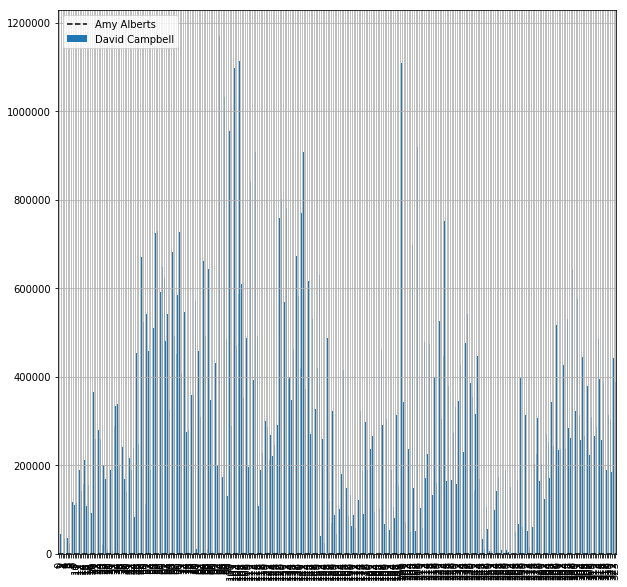

In [104]:
legend = []
plot_values = defaultdict(list)
for title, group in df.groupby('Sales_Person'):
    legend.append(title)
    for date, subgroup in group.groupby('OrderDate'):
        plot_values['TotalOrderPrice'].append(subgroup['TotalOrderPrice'].sum())
        plot_values['OrderDate'].append(date)
        plot_values['Sales_Person'].append(title)
df_plot = pd.DataFrame(plot_values)
df_plot.plot(kind='bar', stacked=True)
    
plt.legend(legend, loc='upper left', prop={'size': 10})
plt.rcParams["figure.figsize"] = (10,10)
plt.show()
